In [1]:
# This is a set of scripts to explore a MVPA analysis with Smith and Wang
# Python 2
# First thing is importing the libraries
import nilearn
from nilearn import datasets,image,masking,signal,plotting,input_data
import numpy as np
import pandas as pd
import sklearn as skl
import os
os.chdir('../')


/usr/local/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Python2 support is deprecated and will be removed in a future release. Consider switching to Python3.
  after removing the cwd from sys.path.
/usr/local/anaconda2/lib/python2.7/site-packages/sklearn/utils/graph.py:15: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .graph_shortest_path import graph_shortest_path  # noqa
/usr/local/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:35: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ..utils.seq_dataset impo

In [4]:
#Second thing is getting the data
# Gonna download 2 sets of masks that we may use
sub_cort_HO=datasets.fetch_atlas_harvard_oxford(
    'sub-prob-2mm')
pauli=datasets.fetch_atlas_pauli_2017()
#List of z_images
func_list=[]
label_list=[]
#List of labels
sublist=os.listdir('data')
for sub in sublist:
    print sub
    func_list.append('data/%s/%s_func.nii.gz'%(sub,sub))
    label_list.append(
        pd.read_csv('data/%s/%s_labels.csv'%(sub,sub)
                   ,sep='\t'))
for df in label_list:
    df['high_low']=df.apply(lambda row: np.greater(row[3],2.5),axis=1 )

sub-119
sub-118
sub-107
sub-113
sub-106
sub-112
sub-125
sub-123
sub-108
sub-111
sub-115
sub-117
sub-120
sub-116
sub-114
sub-109
sub-121
sub-122
sub-104
sub-110


sub-119
data/sub-119/sub-119_func.nii.gz


,Unnamed: 0,0,1,2,3,type,run,high_low
0,0,1.0,1.0,3.0,0.0,a,1,True
1,1,2.0,1.0,1.0,0.0,a,1,False
2,2,3.0,1.0,2.0,0.0,a,1,False
3,3,4.0,1.0,2.0,0.0,a,1,False
4,4,5.0,1.0,2.0,0.0,a,1,False


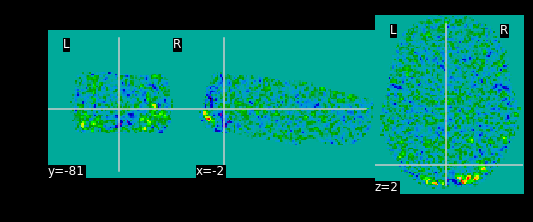

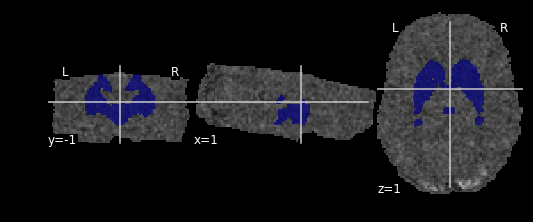

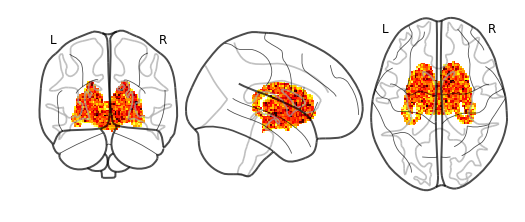

In [5]:
#Let's check out our data and masks
#the behavioral is hopefully easiest to verify
print(sublist[0])
#we can check manually if we want that
#this is correct. It is
print(func_list[0])
display(label_list[0].head())
func=image.load_img(func_list[0])
mean_img=image.image.mean_img(func)
plotting.plot_epi(mean_img)
small_mask=masking.compute_background_mask(
    image.resample_to_img(pauli.maps,mean_img,interpolation='linear'))
plotting.plot_roi(small_mask,mean_img)
masker=input_data.NiftiMasker(small_mask)
masked_img=masker.fit_transform(func)
plotting.plot_glass_brain(image.image.mean_img(
    masker.inverse_transform(masked_img)))

/usr/local/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[False  True]
Classification accuracy: 0.6363 / pvalue: 0.302326


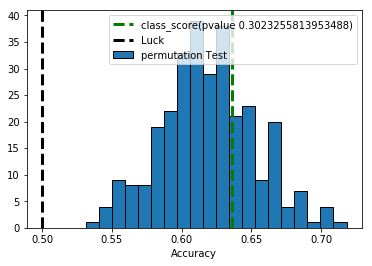

sub-119 was classified with accuracy 0.6362773029439696 and took 57.8709819317 time to permute
[False  True]
Classification accuracy: 0.6698 / pvalue: 0.043189


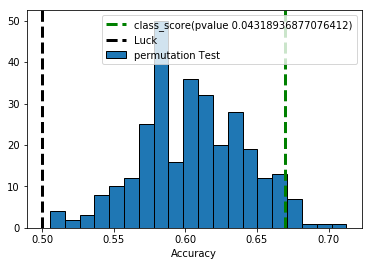

sub-118 was classified with accuracy 0.6697530864197531 and took 58.7738308907 time to permute
[False  True]
Classification accuracy: 0.7066 / pvalue: 0.019934


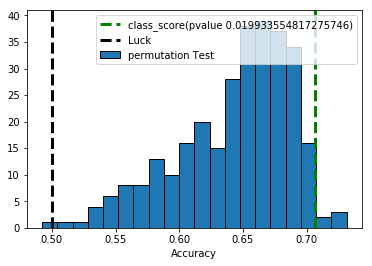

sub-107 was classified with accuracy 0.7065527065527065 and took 56.4335699081 time to permute
[False  True]
Classification accuracy: 0.6999 / pvalue: 0.013289


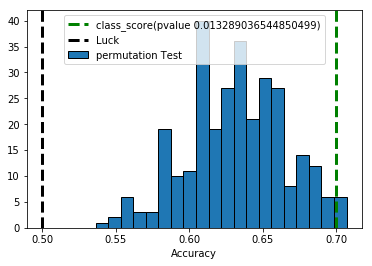

sub-113 was classified with accuracy 0.6999050332383666 and took 55.8378469944 time to permute
[False  True]
Classification accuracy: 0.6140 / pvalue: 0.338870


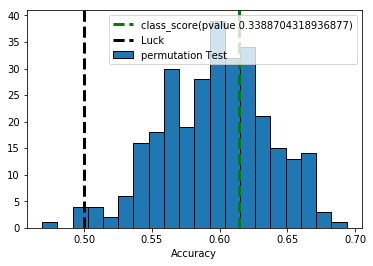

sub-106 was classified with accuracy 0.613960113960114 and took 58.3106892109 time to permute
[False  True]
Classification accuracy: 0.5995 / pvalue: 0.604651


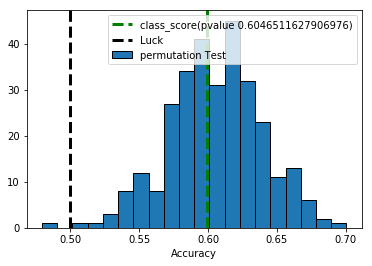

sub-112 was classified with accuracy 0.5994776828110161 and took 57.8920178413 time to permute
[False  True]
Classification accuracy: 0.5007 / pvalue: 0.840532


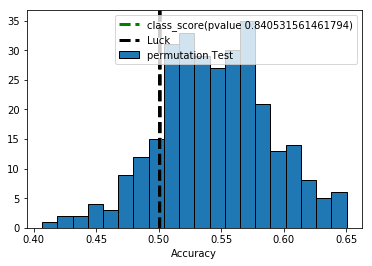

sub-125 was classified with accuracy 0.5007122507122507 and took 57.6557888985 time to permute
[False  True]
Classification accuracy: 0.7001 / pvalue: 0.159468


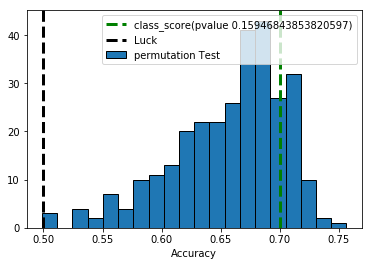

sub-123 was classified with accuracy 0.7001424501424504 and took 55.4891569614 time to permute
[False  True]
Classification accuracy: 0.6683 / pvalue: 0.016611


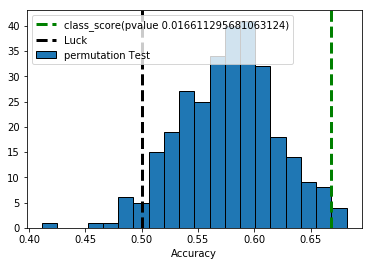

sub-108 was classified with accuracy 0.6683285849952516 and took 59.9394650459 time to permute
[False  True]
Classification accuracy: 0.6130 / pvalue: 0.189369


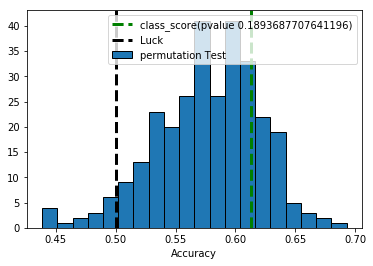

sub-111 was classified with accuracy 0.6130104463437797 and took 56.3744909763 time to permute
[False  True]
Classification accuracy: 0.6054 / pvalue: 0.205980


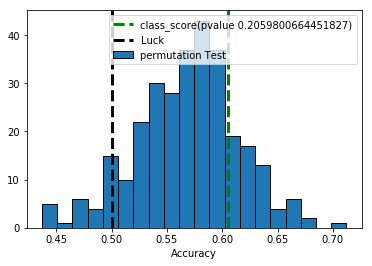

sub-115 was classified with accuracy 0.6054131054131054 and took 57.6469600201 time to permute
[False  True]
Classification accuracy: 0.6135 / pvalue: 0.315615


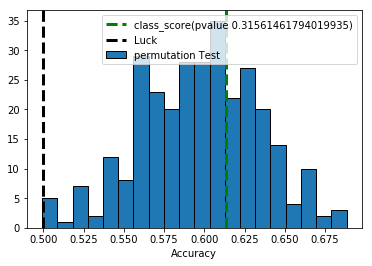

sub-117 was classified with accuracy 0.6134852801519468 and took 57.0373067856 time to permute
[False  True]
Classification accuracy: 0.6698 / pvalue: 0.083056


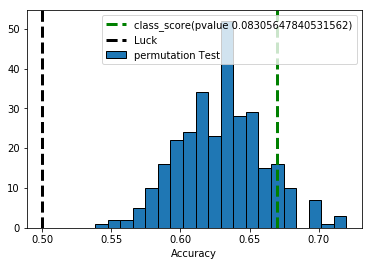

sub-120 was classified with accuracy 0.6697530864197532 and took 57.1173739433 time to permute
[False  True]
Classification accuracy: 0.5613 / pvalue: 0.468439


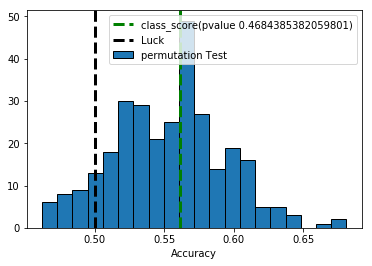

sub-116 was classified with accuracy 0.5612535612535612 and took 56.3995089531 time to permute
[False  True]
Classification accuracy: 0.6185 / pvalue: 0.421927


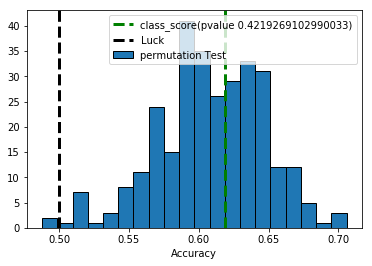

sub-114 was classified with accuracy 0.6184710351377017 and took 56.2342679501 time to permute
[False  True]
Classification accuracy: 0.7358 / pvalue: 0.016611


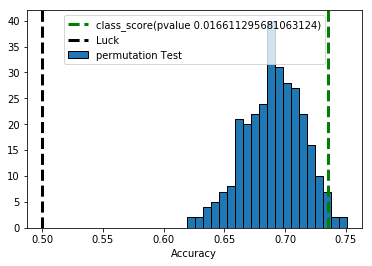

sub-109 was classified with accuracy 0.7357549857549857 and took 56.6992168427 time to permute
[False  True]
Classification accuracy: 0.6066 / pvalue: 0.435216


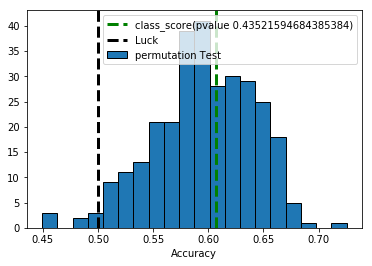

sub-121 was classified with accuracy 0.6066001899335233 and took 56.3752450943 time to permute
[False  True]
Classification accuracy: 0.5819 / pvalue: 0.445183


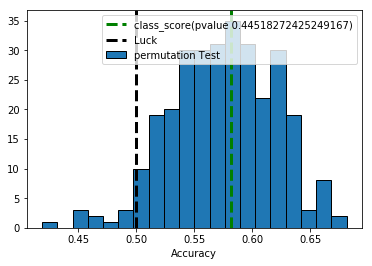

sub-122 was classified with accuracy 0.5819088319088319 and took 57.5359358788 time to permute
[False  True]
Classification accuracy: 0.6569 / pvalue: 0.009967


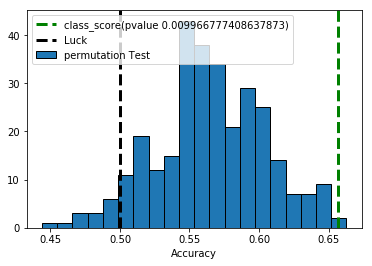

sub-104 was classified with accuracy 0.6569325735992403 and took 58.1245670319 time to permute
[False  True]
Classification accuracy: 0.6876 / pvalue: 0.039867


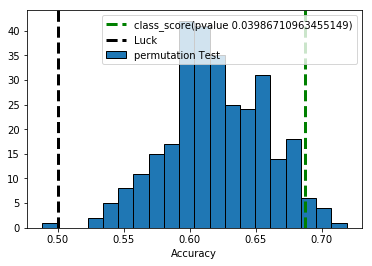

sub-110 was classified with accuracy 0.6875593542260209 and took 56.2630679607 time to permute


In [6]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import LeaveOneLabelOut, cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit,KFold,permutation_test_score
import matplotlib.pyplot as plt
import time
import random

for i,sub in enumerate(sublist):
    start=time.time()
    # Load target information as string and give a numerical identifier to each
    behavioral = label_list[i]
    conditions = behavioral['high_low']

    # We now have 2 conditions
    print(np.unique(conditions))


    # For decoding, standardizing is often very important
    # note that we are also smoothing the data
    
    func_filename = func_list[i]
    X = masker.fit_transform(func_filename)
    # Apply our condition_mask
    
    c=list(zip(X,conditions))
    random.shuffle(c)
    X,conditions=zip(*c)

    svc = SVC(kernel='linear',C=1)

   
    # Define the cross-validation scheme used for validation.
    # Here we use a LeaveOneLabelOut cross-validation on the session label
    # which corresponds to a leave-one-session-out
    cv = KFold(n_splits=6)
    

    
    # Print the results
    score,permutation_scores,pvalue=permutation_test_score(
        svc,X,conditions,scoring="accuracy",cv=cv,n_permutations=300, n_jobs=24)
    
    print("Classification accuracy: %.4f / pvalue: %f" %
          (score,pvalue))
    # Classification accuracy: 0.8009 / Chance level: 0.5000
    plt.hist(permutation_scores,20,label="permutation Test",
            edgecolor="black")
    ylim=plt.ylim()
    plt.plot(2*[score],ylim,'--g',linewidth=3,label='class_score'+'(pvalue %s)' % pvalue)
    plt.plot(2 * [1./np.unique(conditions).size],ylim,'--k',linewidth=3,label='Luck')
    plt.ylim(ylim)
    plt.legend()
    plt.xlabel('Accuracy')
    plt.show()
    
    end_time=(time.time()-start)
    print("%s was classified with accuracy %s and took %s time to permute"%(sub,score,end_time))
        

In [7]:
scores=cross_val_score(svc,X,conditions,cv=10)

In [8]:
print np.mean(scores)

0.69375


In [9]:
svc.fit(X,conditions)
new_scores=svc.score(X,conditions)
np.mean(scores)

0.69375

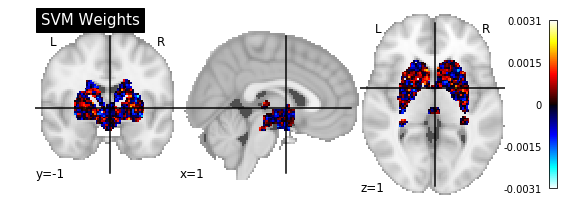

In [10]:
weights=svc.coef_
w_img=masker.inverse_transform(weights)
plotting.plot_stat_map(w_img,title='SVM Weights')
w_img.to_filename('SVM_weights.nii.gz')

In [ ]:
X[0].shape